In [ ]:
import os
import matplotlib.pylab as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.io import loadmat

from second_order_clf import fetch_weights
import sys
sys.path.insert(0, '..')

In [ ]:
# test_sets = ["acc_ic_is", "acc_ic_os", "acc_oc_is", "acc_oc_os"]

def reformat_results(res_df, test_sets, male=0):
    res_reformat = {"Accuracy": [], "Test samples": [], "Lambda": [], "Labelled training samples": [], 
                    "seed": [], "split": [], "fold": [], "Train session": []}
    for idx_ in res_df.index:
        # print(idx_, res_df.iloc[idx_, 12])
        subset_ = res_df.loc[idx_, :]
        for test_set in test_sets:
            res_reformat["Accuracy"].append(subset_[test_set])
            res_reformat["Lambda"].append(subset_["lambda"])
            if "train_session" in subset_:
                res_reformat["Train session"].append(subset_["train_session"])
            else:
                res_reformat["Train session"].append(None)
            _gender = subset_["train_gender"]
            test_set_list = test_set.split("_")
            if _gender == male:
                res_reformat["Labelled training samples"].append("Male")
                if "oc" in test_set_list:
                    res_reformat["Test samples"].append("Female")
                else:
                    res_reformat["Test samples"].append("Male")
            else:
                res_reformat["Labelled training samples"].append("Female")
                if "oc" in test_set_list:
                    res_reformat["Test samples"].append("Male")
                else:
                    res_reformat["Test samples"].append("Female")
                                
            for key in ["seed", "split", "fold"]:
                res_reformat[key].append(subset_[key])
    return pd.DataFrame(res_reformat)

HCP

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/HCP/BNA/Models"
lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
seed_start = 2022
col_names = ["acc_ic_is", "acc_ic_os", "acc_oc_is", "acc_oc_os", "pred_loss", "code_loss"]

res_dict = dict()
res_list = []
for lambda_ in lambdas:
    res_dict[lambda_] = []

for lambda_ in lambdas:
    model_dir = os.path.join(model_root_dir, "lambda%s" % str(int(lambda_)))
    for seed_iter in range(50):
        random_state = seed_start - seed_iter
        res_fname = "results_lambda%s_sub_half_Fisherz_%s.csv" % (str(int(lambda_)), random_state)
        res_df = pd.read_csv(os.path.join(model_dir, res_fname))
        res_df["seed"] = random_state
        res_dict[lambda_].append(res_df)
        res_list.append(res_df)
        
for lambda_ in lambdas:
    res_dict[lambda_] = pd.concat(res_dict[lambda_])
    
res_df_all = pd.concat(res_list)
res_df_all = res_df_all.reset_index(drop=True)

In [ ]:
res_df_is = reformat_results(res_df_all, ["acc_ic_is", "acc_oc_is"])
res_df_os = reformat_results(res_df_all, ["acc_ic_os", "acc_oc_os"])

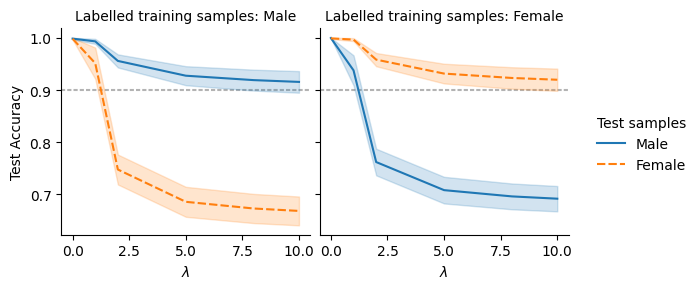

In [ ]:
# sns.set(style="white", font_scale=1.1)
g = sns.relplot(
    data=res_df_is, x="Lambda", y="Accuracy", col="Labelled training samples",
    hue="Test samples", style="Test samples", kind="line", errorbar=("sd", 1), height=3)
(g.map(plt.axhline, y=0.9, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels(r'$\lambda$', "Test Accuracy")
  .set_titles("Labelled training samples: {col_name}")
  .tight_layout(w_pad=0))
plt.savefig('HCP_in_session_test.pdf', format='pdf', bbox_inches='tight')
plt.savefig('HCP_in_session_test.png', format='png', bbox_inches='tight')
plt.show()

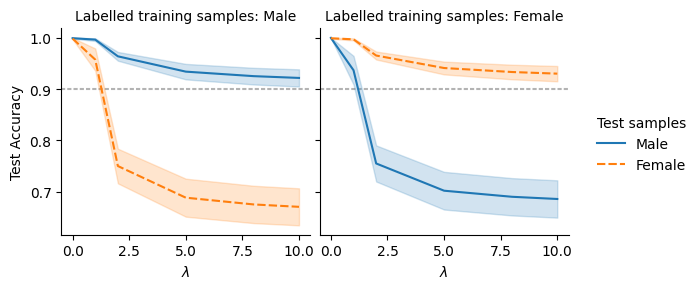

In [ ]:
g = sns.relplot(
    data=res_df_os, x="Lambda", y="Accuracy", col="Labelled training samples",
    hue="Test samples", style="Test samples", kind="line", errorbar=("sd", 1),height=3)
(g.map(plt.axhline, y=0.9, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels(r'$\lambda$', "Test Accuracy") # fontsize=12)
  .set_titles("Labelled training samples: {col_name}")
  .tight_layout(w_pad=0))
plt.savefig('HCP_out_session_test.pdf', format='pdf', bbox_inches='tight')
plt.savefig('HCP_out_session_test.png', format='png', bbox_inches='tight')
plt.show()

GSP

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/brain/brain_networks/gsp/Models"
lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
seed_start = 2023
# col_names = ["acc_ic", "acc_oc", "pred_loss", "code_loss"]
dataset = "gsp"

res_dict = dict()
res_list = []
for lambda_ in lambdas:
    res_dict[lambda_] = []

for lambda_ in lambdas:
    model_dir = os.path.join(model_root_dir, "lambda%s" % str(int(lambda_)))
    for seed_iter in range(50):
        random_state = seed_start - seed_iter
        res_fname = "results_%s_lambda%s_sub_half_Fisherz_%s.csv" % (dataset, str(int(lambda_)), random_state)
        res_df = pd.read_csv(os.path.join(model_dir, res_fname))
        res_df["seed"] = random_state
        res_dict[lambda_].append(res_df)
        res_list.append(res_df)
        
for lambda_ in lambdas:
    res_dict[lambda_] = pd.concat(res_dict[lambda_])
    
res_df_all = pd.concat(res_list)
res_df_all = res_df_all.reset_index(drop=True)

In [ ]:
res_df_reformat = reformat_results(res_df_all, ["acc_ic", "acc_oc"])

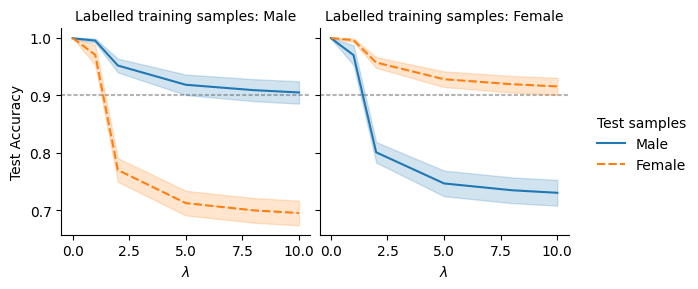

In [ ]:
g = sns.relplot(
    data=res_df_reformat, x="Lambda", y="Accuracy", col="Labelled training samples",
    hue="Test samples", style="Test samples", kind="line", errorbar=("sd", 1),height=3)
(g.map(plt.axhline, y=0.9, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels(r'$\lambda$', "Test Accuracy") # , fontsize=12)
  .set_titles("Labelled training samples: {col_name}")
  .tight_layout(w_pad=0))
plt.savefig('GSP_test.pdf', format='pdf', bbox_inches='tight')
plt.savefig('GSP_test.png', format='png', bbox_inches='tight')
plt.show()

UKB

In [ ]:
model_root_dir = "/media/shuo/MyDrive/data/brain/brain_networks/ukbio/Models"
lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
seed_start = 2023
# col_names = ["acc_ic", "acc_oc", "pred_loss", "code_loss"]
dataset = "ukb"

res_dict = dict()
res_list = []
for lambda_ in lambdas:
    res_dict[lambda_] = []

for lambda_ in lambdas:
    model_dir = os.path.join(model_root_dir, "lambda%s" % str(int(lambda_)))
    for seed_iter in range(50):
        random_state = seed_start - seed_iter
        res_fname = "results_%s_lambda%s_sub_half_Fisherz_%s.csv" % (dataset, str(int(lambda_)), random_state)
        res_df = pd.read_csv(os.path.join(model_dir, res_fname))
        res_df["seed"] = random_state
        res_dict[lambda_].append(res_df)
        res_list.append(res_df)
        
for lambda_ in lambdas:
    res_dict[lambda_] = pd.concat(res_dict[lambda_])
    
res_df_all = pd.concat(res_list)
res_df_all = res_df_all.reset_index(drop=True)

In [ ]:
res_df_reformat = reformat_results(res_df_all, ["acc_ic", "acc_oc"], male=1)

In [ ]:
g = sns.relplot(
    data=res_df_reformat, x="Lambda", y="Accuracy", col="Labelled training samples",
    hue="Test samples", style="Test samples", kind="line", errorbar=("sd", 1),)
(g.map(plt.axhline, y=0.85, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels(r'$\lambda$', "Test Accuracy", fontsize=12)
  .set_titles("Labelled training samples: {col_name}")
  .tight_layout(w_pad=0))
plt.savefig('UKB_test.pdf', format='pdf', bbox_inches='tight')
plt.savefig('UKB_test.png', format='png', bbox_inches='tight')
plt.show()

In [ ]:
dataset = "gsp"
base_dir = "/media/shuo/MyDrive/data/brain/brain_networks/gsp/Models"
sessions = [""]
seed_ = 2023

# dataset = "HCP"
# base_dir = "/media/shuo/MyDrive/data/HCP/BNA/Models"
# sessions = ["REST1_", "REST2_"]
# seed_ = 2022

control_weights = fetch_weights(base_dir, "mix", "0_mix_gender", dataset, sessions=sessions, seed_=seed_)
n_control_weights = control_weights.shape[0]

lambdas = [0.0, 1.0, 2.0, 5.0, 8.0, 10.0]
corrs = {"mean": [], "sd": []}

for lambda_ in lambdas:
    for gender in [0, 1]:
        weights = fetch_weights(base_dir, gender, int(lambda_), dataset, sessions=sessions, seed_=seed_)
        # n_weights = weights.shape[0]
        corr_matrix = np.corrcoef(control_weights, weights)[n_control_weights:, :n_control_weights]
        corrs["mean"].append(np.mean(corr_matrix))
        corrs["sd"].append(np.std(corr_matrix))       

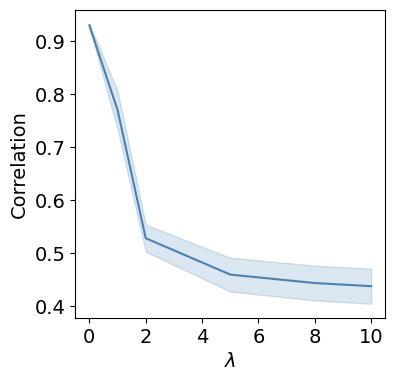

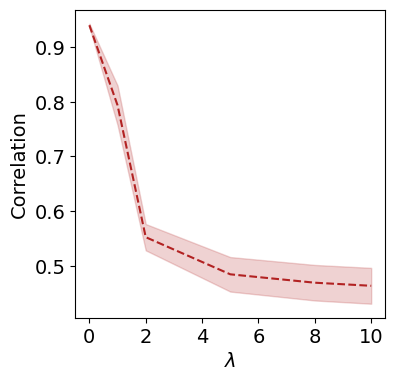

In [ ]:
# plt.figure().set_figheight(4)
fontsize = 14

plt.figure(figsize=(4, 4))
plt.plot(lambdas, corrs['mean'][::2] , '-', c="steelblue")
plt.fill_between(lambdas, np.asarray(corrs['mean'][::2]) - np.asarray(corrs['sd'][::2]), 
                 np.asarray(corrs['mean'][::2]) + np.asarray(corrs['sd'][::2]), color="steelblue", alpha=0.2)
# plt.margins(x=0)
# plt.legend(loc=5)
# plt.ylim(bottom=0.6)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$\lambda$', fontsize=fontsize)
plt.rcParams['text.usetex'] = False
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("Correlation", fontsize=fontsize)
plt.savefig('%s_corr_m.pdf' % dataset, format='pdf', bbox_inches='tight')
plt.savefig('%s_corr_m.png' % dataset, format='png', bbox_inches='tight')
plt.show()

# plt.figure().set_figheight(4)
plt.figure(figsize=(4, 4))
plt.plot(lambdas, corrs['mean'][1::2] , '--', color='firebrick')
plt.fill_between(lambdas, np.asarray(corrs['mean'][1::2]) - np.asarray(corrs['sd'][1::2]), 
                 np.asarray(corrs['mean'][1::2]) + np.asarray(corrs['sd'][1::2]), color='firebrick', alpha=0.2)
plt.rcParams['text.usetex'] = True
plt.xlabel(r'$\lambda$', fontsize=fontsize)
plt.rcParams['text.usetex'] = False
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.ylabel("Correlation", fontsize=fontsize)
plt.savefig('%s_corr_f.pdf' % dataset, format='pdf', bbox_inches='tight')
plt.savefig('%s_corr_f.png' % dataset, format='png', bbox_inches='tight')
plt.show()

In [ ]:
weights_dirs = {
    "Multivariate Control HCP": "./first-order/HCP/L0Gmix.mat", 
    "Multivariate Control GSP": "./first-order/GSP/gsp_L0_mix_genderGmix.mat",
    "CoD $\lambda=0$ Male HCP": "./first-order/HCP/L0G0.mat", 
    "CoD $\lambda=0$ Female HCP": "./first-order/HCP/L0G1.mat", 
    "CoD $\lambda=0$ Male GSP": "./first-order/GSP/L0G0.mat", 
    "CoD $\lambda=0$ Female GSP": "./first-order/GSP/L0G1.mat", 
    "CoD $\lambda=5$ Male HCP": "./first-order/HCP/L5G0.mat", 
    "CoD $\lambda=5$ Female HCP": "./first-order/HCP/L5G1.mat", 
    "CoD $\lambda=5$ Male GSP": "./first-order/GSP/L5G0.mat", 
    "CoD $\lambda=5$ Female GSP": "./first-order/GSP/L5G1.mat", 
    }

weights = dict()

for key in weights_dirs:
    # print(key)
    weights[key] = loadmat(weights_dirs[key])["mean"][0][1:]
    
weight_df = pd.DataFrame(weights)

HCP_tval = pd.read_csv("../PostAnalysis/Chord/Univariate/REST1_univariate_L_vs_R_gender_tvalue_uncorrected.csv")
HCP_tval = HCP_tval.rename(columns={'M_F': 'Univariate control HCP ', 'M': 'Univariate Male HCP', 'F': 'Univariate Female HCP'})
GSP_tval = pd.read_csv("../PostAnalysis/Chord/Univariate/GSP_univariate_L_vs_R_gender_tvalue_uncorrected.csv")
GSP_tval = GSP_tval.rename(columns={'M_F': 'Univariate control GSP ', 'M': 'Univariate Male GSP', 'F': 'Univariate Female GSP'})

weight_df = pd.concat((HCP_tval, GSP_tval, weight_df), axis=1)

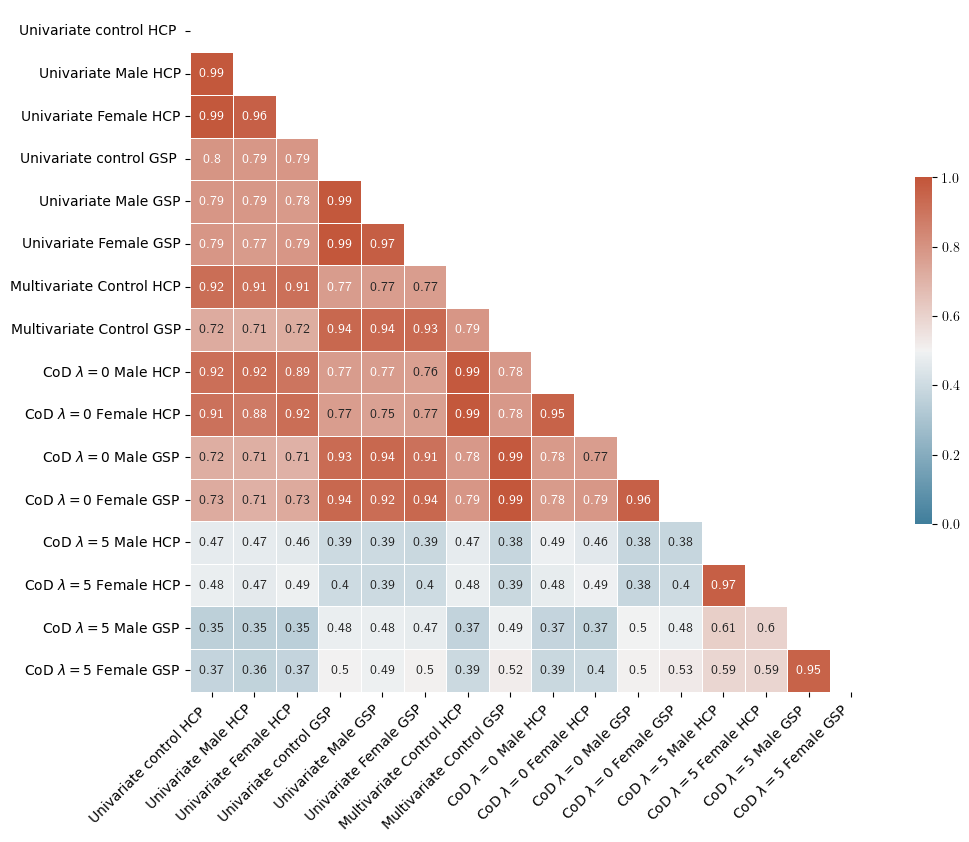

In [ ]:
corr = weight_df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.rcParams['text.usetex'] = True
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=0, vmax=1, center=0.5, annot=True, 
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
            # cbar_kws={"shrink": .5, "use_gridspec": False, "location": "top"})  #, annot_kws={"rotation": 45})
plt.rcParams['text.usetex'] = False
# plt.tick_params(axis='x', labelrotation=45)
ax.set_xticklabels(list(weight_df.columns.values), rotation = 45, ha="right")
# plt.savefig('corr.pdf', format='pdf', bbox_inches='tight')
# plt.savefig('corr.png', format='png', bbox_inches='tight')
plt.savefig('corr_annot.pdf', format='pdf', bbox_inches='tight')
plt.savefig('corr_annot.png', format='png', bbox_inches='tight')
plt.show()